In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from pandas.plotting import scatter_matrix
from keras.losses import mse
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers import Activation
from numpy.linalg import norm
import random

%matplotlib inline

Using TensorFlow backend.


In [2]:
df_atmes = pd.read_csv("americanToadPadraoMes.csv")
#df_gfmes = pd.read_csv("greenFrogPadraoMes.csv")
#df_spmes = pd.read_csv("springPeeperPadraoMes.csv")
#df_atest = pd.read_csv("americanToadPadraoEstacao.csv")
#df_gfest = pd.read_csv("greenFrogPadraoEstacao.csv")
#df_spest = pd.read_csv("springPeeperPadraoEstacao.csv")

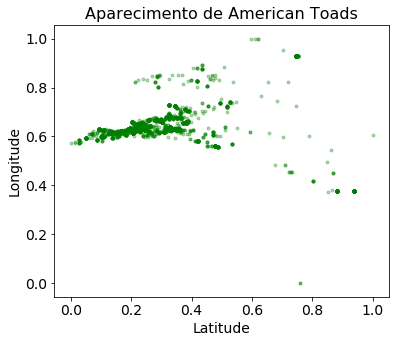

In [3]:
plt.figure(figsize=(6,5))
plt.rc('font',size=14)
plt.rc('axes',titlesize=16)
plt.scatter(df_atmes["lat"], df_atmes["lng"],marker=".",alpha='0.3',color="green")
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.title("Aparecimento de American Toads")
plt.show()

# Autoencoder

In [4]:
df_atmes.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
input_dim = len(df_atmes.columns)
input_dim

28

In [6]:
# Rede com duas camadas decodificadas e batch_normalizzation e Tanh
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="tanh")(batch1)
dp2 = Dropout(0.1)(encoded1) 
encoded2 = Dense(encoding_dim1,activation="tanh")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [7]:
# Cria o modelo para a rede anteriormente montada
autoencoder = Model(entrada,decoded)

In [8]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
# Separa as base de treino e teste
X_trainAtMes, X_testAtMes = train_test_split(df_atmes, test_size=0.30, random_state=42)

In [10]:
batch = len(df_atmes)//10
batch

367

In [11]:
attest_dim = len(X_testAtMes)//10
attest_dim

110

In [12]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history = autoencoder.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_split=0.3,
                callbacks=[es])

Train on 1800 samples, validate on 772 samples
Epoch 1/10000
1800/1800 [==============================] - 3s 2ms/step - loss: 0.1444 - val_loss: 0.1389
Epoch 2/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.1394 - val_loss: 0.1339
Epoch 3/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.1347 - val_loss: 0.1293
Epoch 4/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.1303 - val_loss: 0.1251
Epoch 5/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.1264 - val_loss: 0.1212
Epoch 6/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.1223 - val_loss: 0.1176
Epoch 7/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.1190 - val_loss: 0.1143
Epoch 8/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.1158 - val_loss: 0.1113
Epoch 9/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.1127 - val_loss: 0.1084


Epoch 77/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0106 - val_loss: 0.0098
Epoch 78/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0104 - val_loss: 0.0096
Epoch 79/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0102 - val_loss: 0.0094
Epoch 80/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0100 - val_loss: 0.0092
Epoch 81/10000
1800/1800 [==============================] - 0s 27us/step - loss: 0.0098 - val_loss: 0.0090
Epoch 82/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0096 - val_loss: 0.0088
Epoch 83/10000
1800/1800 [==============================] - 0s 25us/step - loss: 0.0093 - val_loss: 0.0087
Epoch 84/10000
1800/1800 [==============================] - 0s 27us/step - loss: 0.0092 - val_loss: 0.0085
Epoch 85/10000
1800/1800 [==============================] - 0s 29us/step - loss: 0.0091 - val_loss: 0.0083
Epoch 86/10000
1800/1800 [===========

1800/1800 [==============================] - 0s 14us/step - loss: 0.0044 - val_loss: 0.0038
Epoch 154/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0043 - val_loss: 0.0038
Epoch 155/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0042 - val_loss: 0.0037
Epoch 156/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0042 - val_loss: 0.0037
Epoch 157/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0042 - val_loss: 0.0037
Epoch 158/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0042 - val_loss: 0.0037
Epoch 159/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0041 - val_loss: 0.0036
Epoch 160/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0036
Epoch 161/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0036
Epoch 162/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 14us/step - loss: 0.0030 - val_loss: 0.0023
Epoch 230/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0029 - val_loss: 0.0023
Epoch 231/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0030 - val_loss: 0.0023
Epoch 232/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0029 - val_loss: 0.0023
Epoch 233/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0030 - val_loss: 0.0023
Epoch 234/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0030 - val_loss: 0.0023
Epoch 235/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0030 - val_loss: 0.0022
Epoch 236/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0028 - val_loss: 0.0022
Epoch 237/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0029 - val_loss: 0.0022
Epoch 238/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 17us/step - loss: 0.0025 - val_loss: 0.0018
Epoch 305/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0026 - val_loss: 0.0018
Epoch 306/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0025 - val_loss: 0.0017
Epoch 307/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0025 - val_loss: 0.0017
Epoch 308/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0025 - val_loss: 0.0017
Epoch 309/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0025 - val_loss: 0.0017
Epoch 310/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 311/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0024 - val_loss: 0.0017
Epoch 312/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0025 - val_loss: 0.0017
Epoch 313/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 21us/step - loss: 0.0022 - val_loss: 0.0015
Epoch 381/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 0.0015
Epoch 382/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0015
Epoch 383/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0022 - val_loss: 0.0015
Epoch 384/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0023 - val_loss: 0.0015
Epoch 385/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0022 - val_loss: 0.0015
Epoch 386/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0022 - val_loss: 0.0015
Epoch 387/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0022 - val_loss: 0.0015
Epoch 388/10000
1800/1800 [==============================] - 0s 24us/step - loss: 0.0023 - val_loss: 0.0015
Epoch 389/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 0.0014
Epoch 457/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0021 - val_loss: 0.0014
Epoch 458/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0021 - val_loss: 0.0014
Epoch 459/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0022 - val_loss: 0.0014
Epoch 460/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0021 - val_loss: 0.0014
Epoch 461/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0021 - val_loss: 0.0014
Epoch 462/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0020 - val_loss: 0.0014
Epoch 463/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 0.0014
Epoch 464/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0021 - val_loss: 0.0014
Epoch 465/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 14us/step - loss: 0.0021 - val_loss: 0.0013
Epoch 533/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0020 - val_loss: 0.0013
Epoch 534/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0020 - val_loss: 0.0013
Epoch 535/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0020 - val_loss: 0.0013
Epoch 536/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0020 - val_loss: 0.0013
Epoch 537/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 538/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0020 - val_loss: 0.0013
Epoch 539/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0020 - val_loss: 0.0013
Epoch 540/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0019 - val_loss: 0.0013
Epoch 541/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 19us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 609/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 610/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 611/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0020 - val_loss: 0.0012
Epoch 612/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0020 - val_loss: 0.0012
Epoch 613/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 614/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 615/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 616/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0020 - val_loss: 0.0012
Epoch 617/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 14us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 685/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0018 - val_loss: 0.0012
Epoch 686/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0020 - val_loss: 0.0012
Epoch 687/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 688/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 689/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 690/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 691/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 692/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 693/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 761/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 762/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 763/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 764/10000
1800/1800 [==============================] - 0s 24us/step - loss: 0.0018 - val_loss: 0.0012
Epoch 765/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 766/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 767/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0018 - val_loss: 0.0012
Epoch 768/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 769/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 14us/step - loss: 0.0019 - val_loss: 0.0012
Epoch 837/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 838/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 839/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 840/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 841/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 842/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 843/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0017 - val_loss: 0.0011
Epoch 844/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 845/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 913/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0017 - val_loss: 0.0011
Epoch 914/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0017 - val_loss: 0.0011
Epoch 915/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 916/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 917/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 918/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 919/10000
1800/1800 [==============================] - ETA: 0s - loss: 0.001 - 0s 20us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 920/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 921/10000
1800

1800/1800 [==============================] - 0s 14us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 988/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 989/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0019 - val_loss: 0.0011
Epoch 990/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0017 - val_loss: 0.0011
Epoch 991/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0017 - val_loss: 0.0011
Epoch 992/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 993/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0017 - val_loss: 0.0011
Epoch 994/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 995/10000
1800/1800 [==============================] - 0s 30us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 996/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 18us/step - loss: 0.0017 - val_loss: 0.0011
Epoch 1063/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 1064/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0017 - val_loss: 0.0011
Epoch 1065/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 1066/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0017 - val_loss: 0.0011
Epoch 1067/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 1068/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 1069/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 1070/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 1071/10000
1800/1800 [========

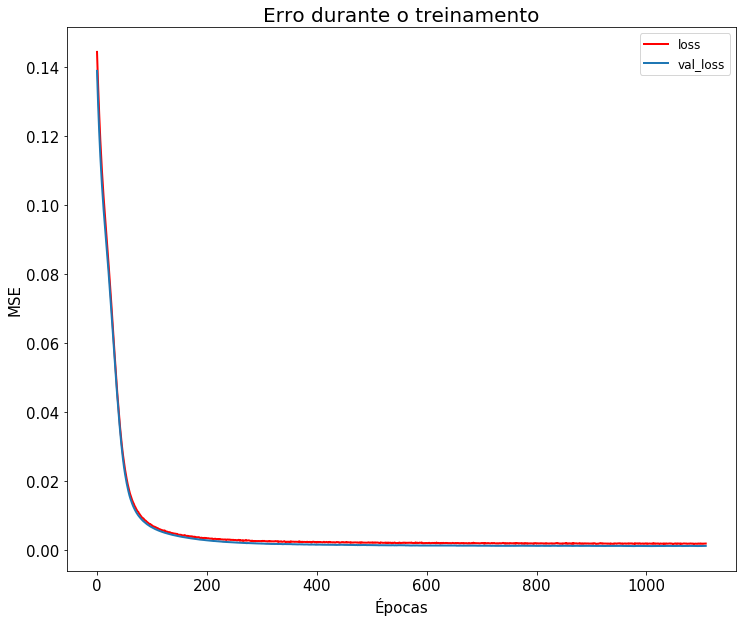

In [13]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history.history['loss'],color='r',label="loss",linewidth=2)
plt.plot(history.history['val_loss'],label="val_loss",linewidth=2)
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [14]:
# Faz a previsão para a base de teste
testeAtMes = autoencoder.predict(X_testAtMes)

In [15]:
# Calcula o erro (MSE) para o teste
autoencoder.evaluate(x=X_testAtMes, y=X_testAtMes, batch_size=attest_dim)
#20% de dropout: 0.0016651906830162412
#30% de dropout: 0.12273836268258981

1103/1103 [==============================] - 0s 19us/step


0.0007820226656999575

In [16]:
# Calcula o erro (MSE) para o treino
autoencoder.evaluate(x=X_trainAtMes, y=X_trainAtMes, batch_size=batch)
#20% de dropout: 0.0016855491797981457
#30% de dropout: 0.12279615244751399

2572/2572 [==============================] - 0s 10us/step


0.000802629659718017

# Feature Selection

## Métricas de Características da Base

In [17]:
def classifica_dict(d, reverso):
    feature = []
    valor = []
    for b in sorted(d, key = d.get,reverse=reverso):
        feature.append(b)
        valor.append(d[b])
    return feature, valor

In [18]:
def interquartile_ranking_ranking(data):
    ir = {}
    zeros = {}
    for c in data.columns:
        inter = data[c].quantile(q=0.75) - data[c].quantile(q=0.25)
        if (inter == 0):
            zeros[c] = inter
        else:
            ir[c] = inter 
    return classifica_dict(ir,reverso=False), zeros

In [19]:
ir, zeros = interquartile_ranking_ranking(df_atmes)
ir

(['lng',
  'maxwspdm',
  'meanwindspdm',
  'date',
  'maxtempm',
  'meantempm',
  'minwspdm',
  'mintempm',
  'lat',
  'maxdewptm',
  'heatingdegreedays',
  'maxpressurem',
  'mindewptm',
  'meanpressurem',
  'maxhumidity',
  'minpressurem',
  'meandewptm',
  'humidity',
  'minhumidity',
  'gdegreedays',
  'meanwdird'],
 [0.031597279692543,
  0.05500000000000001,
  0.05714285714285715,
  0.09090909090909088,
  0.11764705882352944,
  0.12962962962962965,
  0.1313131313131313,
  0.13793103448275867,
  0.15135276256531535,
  0.1568627450980392,
  0.15789473684210528,
  0.16326530612244888,
  0.16666666666666674,
  0.17071147064924203,
  0.1842105263157895,
  0.19148936170212771,
  0.1923076923076923,
  0.25,
  0.27083333333333326,
  0.4,
  0.6481994459833795])

In [20]:
for c in zeros.keys():
    df_atmes.drop(c,axis=1,inplace=True)
zeros

{'coolingdegreedays': 0.0,
 'fog': 0.0,
 'hail': 0.0,
 'precipm': 0.0,
 'rain': 0.0,
 'snow': 0.0,
 'thunder': 0.0}

## Agregação de Rankings

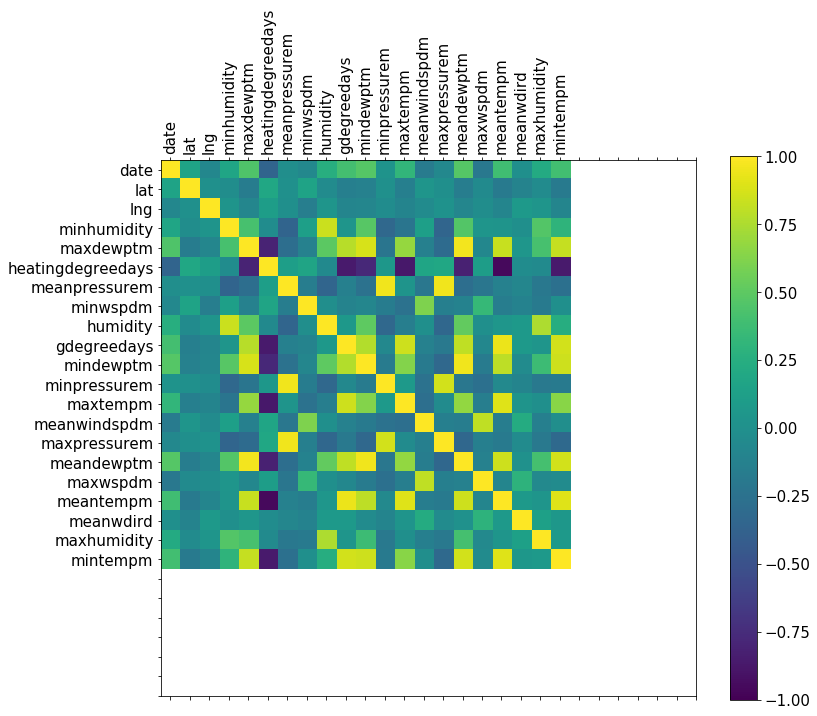

In [21]:
# Plota matriz de correlação
# Quanto mais correlacionadas duas features, mais forte é a cor de interseção entre elas
# crescem justas na mesma direção = bem correlacionadas
# crescem em direções opostas = mal correlacionadas
plt.rc('font', size=15)
plt.rc('axes', titlesize=22)
correlations = df_atmes.corr()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,input_dim,1)
ax.set_yticks(ticks)
ax.set_xticks(ticks)
ax.set_xticklabels(df_atmes.columns,rotation=90)
ax.set_yticklabels(df_atmes.columns)
plt.show()

## Treinamento de Rede Final com as features selecionadas

In [22]:
input_dim = len(df_atmes.columns)
input_dim

21

In [23]:
# Rede com duas camadas decodificadas e batch_normalizzation e Tanh
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="tanh")(batch1)
dp2 = Dropout(0.1)(encoded1)
encoded2 = Dense(encoding_dim1,activation="tanh")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [24]:
# Cria o modelo para a rede anteriormente montada
final_autoencoder = Model(entrada,decoded)

In [25]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
final_autoencoder.compile(optimizer='adam', loss='mse')

In [26]:
# Separa as base de treino e teste
X_trainAtMes, X_testAtMes = train_test_split(df_atmes, test_size=0.30, random_state=42)

In [27]:
batch = len(df_atmes)//10
batch
attest_dim = len(X_testAtMes)//10
attest_dim

110

In [28]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history = final_autoencoder.fit(X_trainAtMes, X_trainAtMes,
                epochs=3000,
                batch_size=batch,
                shuffle=True,
                validation_split=0.3,
                callbacks=[es])

Train on 1800 samples, validate on 772 samples
Epoch 1/3000
1800/1800 [==============================] - 1s 472us/step - loss: 0.1046 - val_loss: 0.1017
Epoch 2/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.1010 - val_loss: 0.0976
Epoch 3/3000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0968 - val_loss: 0.0939
Epoch 4/3000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0936 - val_loss: 0.0904
Epoch 5/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0901 - val_loss: 0.0871
Epoch 6/3000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0871 - val_loss: 0.0840
Epoch 7/3000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0842 - val_loss: 0.0810
Epoch 8/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0811 - val_loss: 0.0783
Epoch 9/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0787 - val_loss: 0.0756
Epoch 1

Epoch 78/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0084 - val_loss: 0.0076
Epoch 79/3000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0083 - val_loss: 0.0074
Epoch 80/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0080 - val_loss: 0.0073
Epoch 81/3000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0079 - val_loss: 0.0071
Epoch 82/3000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0077 - val_loss: 0.0069
Epoch 83/3000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0068
Epoch 84/3000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0074 - val_loss: 0.0067
Epoch 85/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0073 - val_loss: 0.0065
Epoch 86/3000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0072 - val_loss: 0.0064
Epoch 87/3000
1800/1800 [=====================

Epoch 155/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0031
Epoch 156/3000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0031
Epoch 157/3000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0040 - val_loss: 0.0031
Epoch 158/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0041 - val_loss: 0.0031
Epoch 159/3000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0030
Epoch 160/3000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0030
Epoch 161/3000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0040 - val_loss: 0.0030
Epoch 162/3000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0039 - val_loss: 0.0030
Epoch 163/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0039 - val_loss: 0.0030
Epoch 164/3000
1800/1800 [===========

1800/1800 [==============================] - 0s 20us/step - loss: 0.0031 - val_loss: 0.0021
Epoch 232/3000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0031 - val_loss: 0.0021
Epoch 233/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0021
Epoch 234/3000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 235/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0030 - val_loss: 0.0020
Epoch 236/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 237/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 238/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0030 - val_loss: 0.0020
Epoch 239/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0030 - val_loss: 0.0020
Epoch 240/3000
1800/1800 [==========================

1800/1800 [==============================] - 0s 14us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 308/3000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 309/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 310/3000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 311/3000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0030 - val_loss: 0.0016
Epoch 312/3000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 313/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 314/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 315/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 316/3000
1800/1800 [==========================

1800/1800 [==============================] - 0s 16us/step - loss: 0.0027 - val_loss: 0.0014
Epoch 384/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 385/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 386/3000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 387/3000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 388/3000
1800/1800 [==============================] - 0s 24us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 389/3000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 390/3000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0026 - val_loss: 0.0013
Epoch 391/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 392/3000
1800/1800 [==========================

1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 460/3000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 461/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 462/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 463/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0026 - val_loss: 0.0012
Epoch 464/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 465/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 466/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 467/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 468/3000
1800/1800 [==========================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 536/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 537/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 538/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 539/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 540/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 541/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0011
Epoch 542/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 543/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 544/3000
1800/1800 [==========================

1800/1800 [==============================] - 0s 16us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 612/3000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 613/3000
1800/1800 [==============================] - ETA: 0s - loss: 0.002 - 0s 16us/step - loss: 0.0025 - val_loss: 0.0010
Epoch 614/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 615/3000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 616/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 617/3000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 618/3000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 619/3000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 620/3000
1800/1800 [==

1800/1800 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 688/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 689/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 690/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 691/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 692/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 693/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 694/3000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 695/3000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 696/3000
1800/1800 [==========================

1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 9.8778e-04
Epoch 763/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.9040e-04
Epoch 764/3000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 9.8438e-04
Epoch 765/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.7637e-04
Epoch 766/3000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 9.8679e-04
Epoch 767/3000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0023 - val_loss: 9.9242e-04
Epoch 768/3000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0022 - val_loss: 9.9018e-04
Epoch 769/3000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0023 - val_loss: 9.8869e-04
Epoch 770/3000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.9052e-04
Epoch 771/3000
1

1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 838/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 9.9114e-04
Epoch 839/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 9.9520e-04
Epoch 840/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 841/3000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 842/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 843/3000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 844/3000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 845/3000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 846/3000
1800/1800 [==================

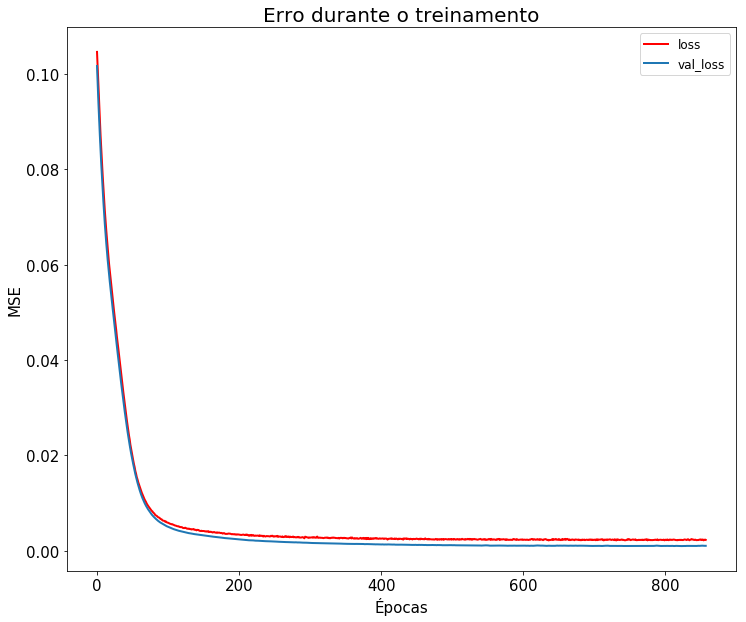

In [29]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history.history['loss'],color='r',label="loss",linewidth=2)
plt.plot(history.history['val_loss'],label="val_loss",linewidth=2)
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [30]:
# Faz a previsão para a base de teste
testeAtMes = final_autoencoder.predict(X_testAtMes)

In [31]:
# Calcula o erro (MSE) para o teste
final_autoencoder.evaluate(x=X_testAtMes, y=X_testAtMes, batch_size=attest_dim)

1103/1103 [==============================] - 0s 19us/step


0.0010023679665956014

In [32]:
# Calcula o erro (MSE) para o treino
final_autoencoder.evaluate(x=X_trainAtMes, y=X_trainAtMes, batch_size=batch)

2572/2572 [==============================] - 0s 7us/step


0.000994949244604769

# Teste de Modelo e Estimação de Probabilidade

In [33]:
# Pn = e^-(||x-x^||)
def estimar_prob1(entrada):
    recons = final_autoencoder.predict(entrada)
    return pow(math.e, -norm(entrada-recons))

In [34]:
# Pn = e^||x-x^||/sum(e^||xi-x^i||)
def estimar_prob2(dados):
    ests = []
    norms = []
    size = len(dados)
    difs = dados - final_autoencoder.predict(dados)
    for i in dados.index:
        norms.append(pow(math.e,norm(difs.loc[i])))
    for i in range(size):
        ests.append(norms[i]/(np.sum(norms[0:i]) + np.sum(norms[i+1:size])))
    return ests

In [35]:
ests1 = []
for i in X_testAtMes.index:
    ests1.append(estimar_prob1(np.array(X_testAtMes.loc[i]).reshape(1,21)))

In [36]:
ests2 = estimar_prob2(X_testAtMes)

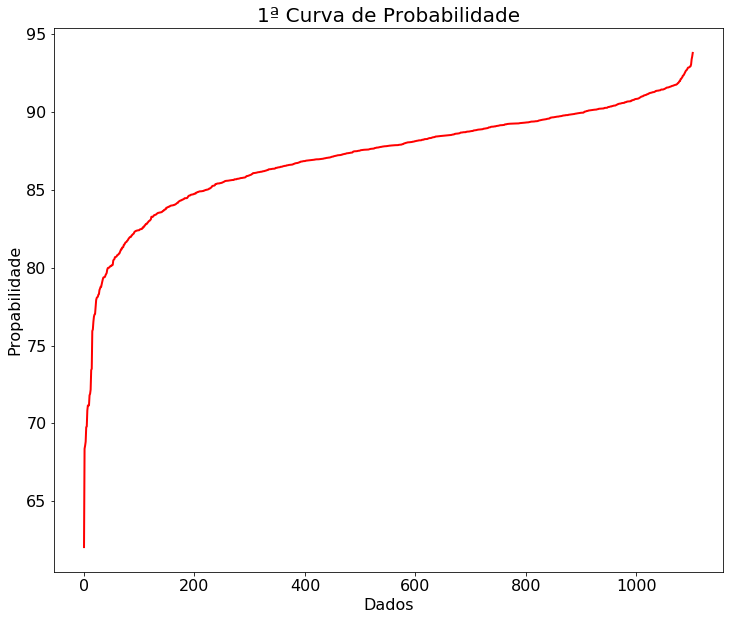

In [37]:
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=16)
plt.plot(range(0,len(X_testAtMes)),np.sort(ests1)*100,color='r',label=u"Opção 1",linewidth=2)
#plt.plot(range(0,len(df_atmes[:500])),np.sort(ests2[:500])*100,color='b',label=u"Opção 2")
plt.xlabel('Dados')
plt.ylabel('Propabilidade')
plt.title(u'1ª Curva de Probabilidade')
#plt.legend()
plt.show()

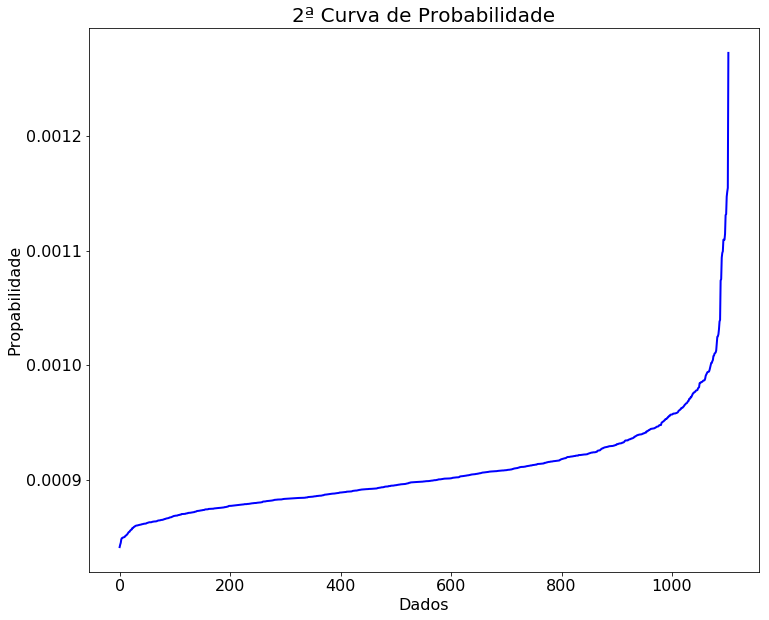

In [38]:
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=16)
plt.plot(range(0,len(X_testAtMes)),np.sort(ests2),color='b',label=u"Opção 2",linewidth=2)
plt.xlabel('Dados')
plt.ylabel('Propabilidade')
plt.title(u'2ª Curva de Probabilidade')
#plt.legend()
plt.show()

# Heatmap do Canadá

In [49]:
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/species_distributions.py
def construct_grid_canada():
    # x,y coordinates for corner cells
    xmin = -139.637260
    xmax = -54.788139
    ymin = 49.385495
    ymax = 74.081135

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, (xmax-xmin)/500.0)
    random.shuffle(xgrid)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, (ymax-ymin)/500.0)
    random.shuffle(ygrid)

    return (xgrid, ygrid)

In [50]:
gx, gy = construct_grid_canada()

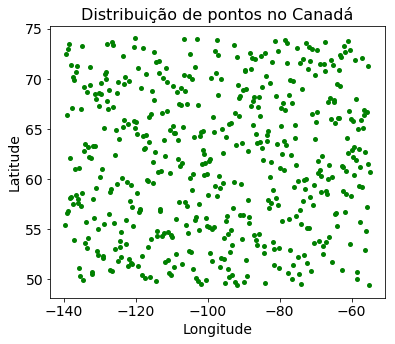

In [51]:
plt.figure(figsize=(6,5))
plt.rc('font',size=14)
plt.rc('axes',titlesize=16)
plt.scatter(gx, gy,marker=".",color="green",linewidth=2)
plt.xlabel('Longitude')
plt.ylabel("Latitude")
plt.title(u"Distribuição de pontos no Canadá")
plt.show()

In [66]:
import folium
mapa = folium.Map(location=[60.078299,-100.151798],zoom_start=4)
for la,lo in zip(gy,gx):
    folium.Marker([la, lo]).add_to(mapa)
mapa

# Variational Autoencoder